# CS - 3. Common Algorithms - 3.5 Graph - 3.5.1 Breadth First Search(BFS)

Breadth First Search
💡Breadth first search for a graph is a way to traverse the graph. It starts at the root node and explores all of the neighbor nodes at the present depth prior to moving on to the nodes at the next depth level.

 

넓이 우선 탐색은 그래프를 탐색하는 방법입니다. 루트 노드에서 시작하여 다음 심도 수준의 노드로 이동하기 전에 현재 심도에 있는 모든 이웃 노드를 탐색합니다.

알고리즘 문제하면 대중적으로 잘 알려진 BFS, 넓이 우선 탐색 입니다.

## In Python

In [4]:
def bfs(graph: dict, start: int):
    # 방문한 노드를 기록하기 위한 딕셔너리를 초기화합니다.
    visited = {node: False for node in graph.keys()}

    # 탐색을 시작할 노드를 큐에 넣습니다.
    queue = [start]

    # 시작 노드를 방문했다고 표시합니다.
    visited[start] = True

    # 방문 순서를 기록합니다.
    order_of_visit = []


    # 큐가 비어있지 않을 때까지 반복합니다.
    while queue:
        # 큐에서 노드를 하나 꺼냅니다. 이 노드를 현재 노드라고 합니다.
        current_node = queue.pop(0)
        order_of_visit.append(current_node)

        # 현재 노드와 연결된 노드들을 확인합니다.
        for adjacent_node in graph[current_node]:
            # 만약 인접한 노드를 아직 방문하지 않았다면,
            if not visited[adjacent_node]:
                # 해당 노드를 방문합니다.
                queue.append(adjacent_node)
                visited[adjacent_node] = True
                
    return order_of_visit


In [5]:
graph_example = {
    1: [2, 3, 4],
    2: [5],
    3: [5],
    4: [],
    5: [6, 7],
    6: [],
    7: [3],
}

bfs(graph_example, 1)


[1, 2, 3, 4, 5, 6, 7]

위에서 정의한 BFS 함수대로, 시작 노드로부터 가장 가까운 노드부터 탐색하고, 그다음 가까운 노드를 탐색하는 방식으로 진됩니다.

1-2,3,4 를 순서대로 방문한 뒤, 2,3,4 노드를 방문하려고하나 이미 방문한 노드기에 그다음 가까운 5번 노드를 방문합니다.

5-6,7 로 연결되어 있어 그다음 6,7 노드를 방문합니다.

 

살짝 이렇게 보면 1,2,3,4,5,6,7 그냥 순서대로 방문하는거 아니냐? 라고 생각할 수 도 있습니다.

In [13]:
graph_example2 = {
    1: [2, 3],
    2: [4],
    3: [6],
    4: [5],
    5: [],
    6: [],
    7: [],
    8: [6, 7]
    
}

bfs(graph_example2, 1)


[1, 2, 3, 4, 6, 5]

 

이 경우 시작 노드는 1이므로, 1과 직접 연결된 노드인 2, 3을 먼저 방문합니다. 

그 다음으로는 2와 3에서 갈 수 있는 노드인 4와 6을 방문하게 됩니다. 4에서는 다시 5로 이동할 수 있으므로 5를 방문하게 됩니다.

 

왜 7과 8 노드가 없을까요?

그래프의 엣지 특성인 방향성의 존재 때문이기도 합니다.

https://parkpakrsu.tistory.com/327

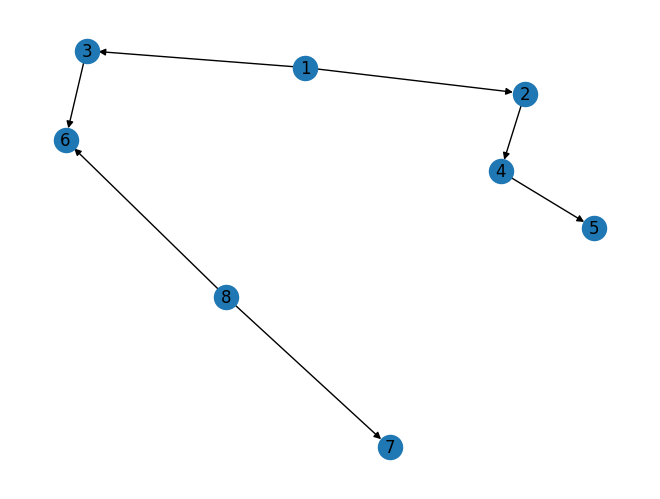

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

graph_example2 = {
    1: [2, 3],
    2: [4],
    3: [6],
    4: [5],
    5: [],
    6: [],
    7: [],
    8: [6, 7]
}

G = nx.DiGraph()

for node, edges in graph_example2.items():
    for edge in edges:
        G.add_edge(node, edge)

nx.draw(G, with_labels=True)
plt.show()


선만 본다면 1 - 3 - 6 - 8 이런식으로 갈수 있다고 생각하겠지만, 그래프의 엣지는 방향성이 있습니다.

화살표의 방향으로만 노드의 이동을 진행할 수 있기에,  탐색 시작노드인 1에서 8으로 갈 방법이 없는 것입니다.

In [32]:
bfs(graph_example2, 8)

[8, 6, 7]

같은 그래프의 탐색을 8번에서 부터 시작한다면 8,6,7 순서로 탐색이 끝나게 됩니다.

## 활용
 

BFS 알고리즘이 활용되는 곳은 다양합니다.

1. 두 노드 사이의 최단 경로 혹은 임의의 경로를 찾아야 할 때
2. 그래프에 포함된 모든 노드를 방문해야 할 때
3. 두 노드가 연결되어 있는지 확인해야 할 때

 

좀더 실제적인 예시를 들어 보겠습니다.

 

1. SNS 친구 추천 시스템

- 사용자를 시작 노드로 BFS를 수행, 가장 가까운 노드(즉, 친구)를 먼저 방문하고, 그 다음으로 가까운 노드(친구의 친구)를 방문하는 형식으로 친구 추천을 할 수 있습니다. 링크드인에서 1촌, 2촌, 3촌, 3촌이상 같은 것을 볼 수 있습니다.

 

2. GPS 네비게이션 

- BFS 는 GPS 네비게이션 시스템에서 최단 경로를 찾는 데 사용됩니다. 특정 위치에서 목적지 까지 최단 경로를 찾기위해, 시작 위치에서 BFS를 수행하여 가장 가까운 위치부터 방문, 그 다음으로 가까운 위치를 방문 하는 방식으로 최단 경로를 찾을 수 있습니다.

 

3. 네트워크 라우팅

- 네트워크에서 패킷을 전송하는 최적의 경로를 찾는 데 BFS가 사용됩니다. 라우터는 BFS를 사용하여 가장 가까운 라우터 부터 방문하고, 그 다음으로 가까운 라우터를 방문하는 방식으로 최적의 경로를 찾습니다.